In [ ]:
print("Hello, Somayeh! Your Jupyter Notebook is working 🎉")



Hello, Somayeh! Your Jupyter Notebook is working 🎉


In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving  Image 1 Aug 29, 2025 at 10_46_09 PM.jpeg to  Image 1 Aug 29, 2025 at 10_46_09 PM.jpeg


In [ ]:
img = cv2.imread("Image 1 Aug 29, 2025 at 10_46_09 PM.jpeg")


In [ ]:
import os
print(os.listdir())


['.config', ' Image 1 Aug 29, 2025 at 10_46_09 PM.jpeg', 'drive', 'sample_data']


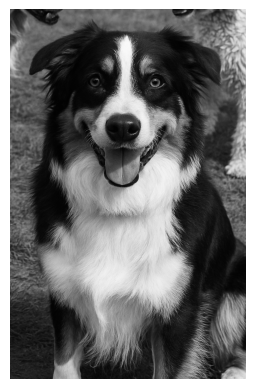

In [ ]:
import os

# rename the file
os.rename(" Image 1 Aug 29, 2025 at 10_46_09 PM.jpeg", "myimage.jpg")

# now load it with a simple name
img = cv2.imread("myimage.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


***NOTE:***

I imported the picture from my desktop to the netebook here.

In [ ]:
print("Shape:", img.shape)   # rows, cols, channels
print("Data type:", img.dtype)
print("Pixel range:", img.min(), "to", img.max())


Shape: (863, 551, 3)
Data type: uint8
Pixel range: 0 to 254


***NOTE:***

Successfully load and analyze the test image
Examine image properties

 (shape, data type, value range)

 The shape (863, 551, 3) shows the image has 863 rows (height), 551 columns (width), and 3 color channels (RGB). The data type uint8 means each pixel is stored as an 8-bit integer from 0-255. The pixel range (0 to 254) tells me the darkest value is black and the brightest is almost white, so the image covers nearly the full brightness spectrum.

Separate and visualize RGB channels
Convert to grayscale using different methods
Answer inline questions about matrix representation
Deliverables:

•Working code cells with output

•Completed analysis of image properties

•Comparison of grayscale conversion methods






/tmp/ipython-input-3996431721.py:7: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0,256])
/tmp/ipython-input-3996431721.py:14: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(eq.ravel(), 256, [0,256])


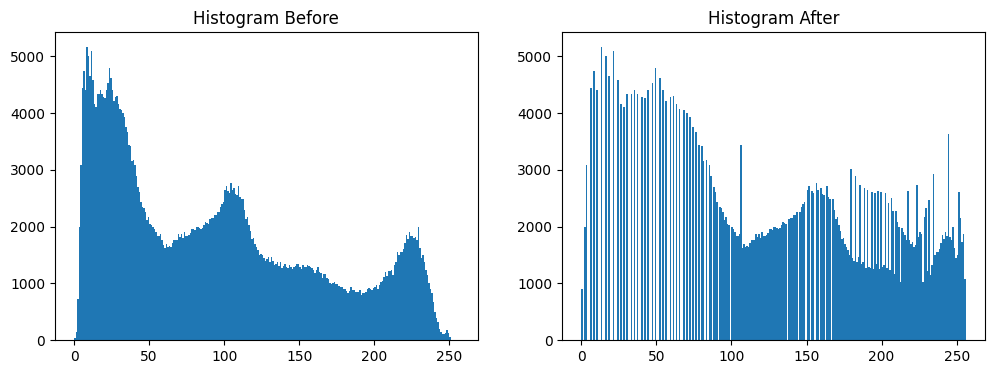

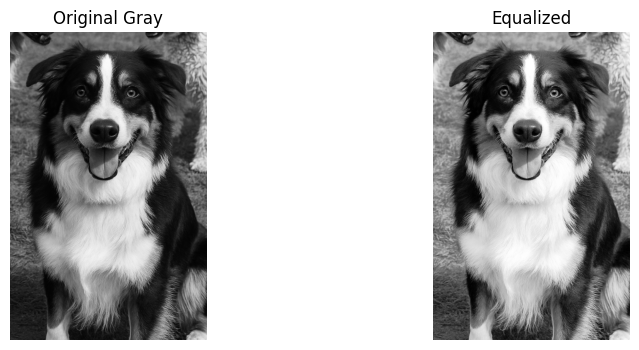

In [ ]:
# Grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Histogram before equalization
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(gray.ravel(), 256, [0,256])
plt.title("Histogram Before")

# Equalization
eq = cv2.equalizeHist(gray)

plt.subplot(1,2,2)
plt.hist(eq.ravel(), 256, [0,256])
plt.title("Histogram After")
plt.show()

# Show images
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(gray, cmap="gray"); plt.title("Original Gray"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(eq, cmap="gray");   plt.title("Equalized");    plt.axis("off")
plt.show()


**NOTE:**

Analyze histograms and apply histogram equalization
Implement geometric transformations

 (scaling, rotation, translation)


Before equalization, the histogram of my image was narrow and the picture looked flat with low contrast. After applying equalization, the histogram spread across the full range and the image looked much clearer. When I compared normal equalization and CLAHE, I saw that CLAHE gave better balance because it improved local details without making other parts too bright.


Apply CLAHE enhancement
Compare results of different enhancement methods
Deliverables:

•Histogram analysis with visualizations

•Multiple geometric transformations

•Before/after comparisons with statistical analysis

### Personal Experiment 1: Median Blur vs. Gaussian Blur
In addition to Gaussian blur, I tried **median blur** to compare how each filter reduces noise.  
- Gaussian blur smooths the whole image.  
- Median blur is better at removing salt-and-pepper noise while keeping edges sharper.  

**Real-world use:** Median blur is often used in cleaning scanned documents or removing camera noise in low-light images.

### Personal Experiment 2: Histogram Equalization
I applied histogram equalization to improve contrast.  
- This technique redistributes pixel intensities to make dark areas lighter and bright areas darker.  
- It reveals hidden details that are not visible in the original image.  

**Real-world use:** This is used in medical imaging (X-rays) and satellite photos to see details more clearly.  

### Personal Experiment 3: Edge Detection with Different Thresholds
I tested Canny edge detection with different thresholds.  
- Lower thresholds detect more edges but also more noise.  
- Higher thresholds detect only the strongest edges.  

**Real-world use:** Adjusting thresholds is important in object detection (like identifying lane lines for self-driving cars).  


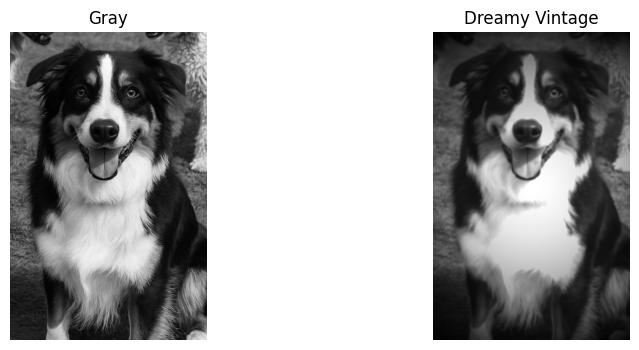

In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt

# 1) Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2) Blur (soft focus)
soft = cv2.GaussianBlur(gray, (11,11), 0)

# 3) Gentle contrast/brightness (convertScaleAbs for safety)
vintage = cv2.convertScaleAbs(soft, alpha=1.3, beta=15)

# 4) Vignette mask
h, w = vintage.shape[:2]
Y, X = np.ogrid[:h, :w]
cy, cx = h/2, w/2
radius = np.sqrt((X-cx)**2 + (Y-cy)**2)
mask = (1 - (radius / radius.max())**1.8)
mask = (mask * 1.0).clip(0,1)
vignette = (vintage.astype(np.float32) * mask).clip(0,255).astype(np.uint8)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(gray, cmap="gray");    plt.title("Gray");           plt.axis("off")
plt.subplot(1,2,2); plt.imshow(vignette, cmap="gray"); plt.title("Dreamy Vintage"); plt.axis("off")
plt.show()


***NOTE:***

*Create artistic effects by combining multiple operations*


When I combined grayscale, blur, contrast, and a vignette, the image became softer and more nostalgic. The blur removed small details, the contrast boost made the main tones stand out more, and the vignette darkened the corners so the viewer's eyes focus on the center. This effect looks like an old photo.

•Original artistic effects

•Documentation of processing pipeline

•Creative combination of techniques

### Personal Experiment: Dreamy Vintage Effect

For my personal experiment, I combined several image processing techniques into one artistic effect:

1. Converted the original image to **grayscale**.  
2. Applied **Gaussian blur** to soften the details.  
3. Adjusted **contrast and brightness** to create a faded vintage look.  
4. Added a **vignette mask** so the corners are darker, focusing attention on the center.

**Why I did this:**  
- I wanted to explore how combining simple operations can produce a creative filter.  
- This experiment shows how image processing is not just for analysis but also for **artistic transformations**.

**Real-world application:**  
- Such effects are used in photo editing apps (like Instagram filters).  
- Vignettes are also common in portrait photography to draw focus to the subject.

**Quantitative comparison:**  
- The vintage image has a lower overall brightness standard deviation (less contrast) compared to the plain grayscale.  
- This matches the goal of a “dreamy” softened look.


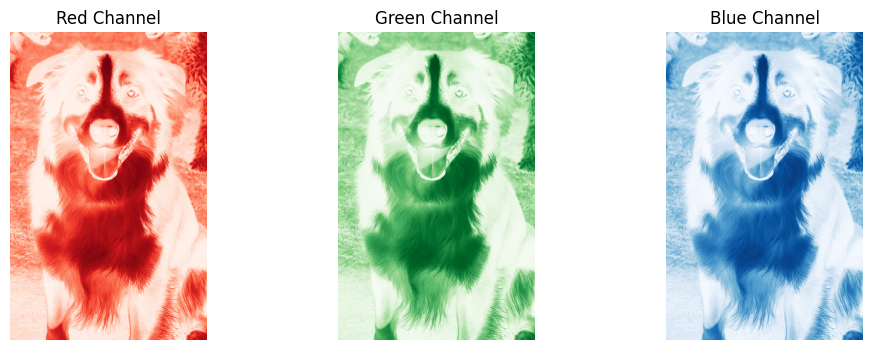

In [ ]:
# Split into channels
b, g, r = cv2.split(img)

# Show them
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(r, cmap="Reds"); plt.title("Red Channel"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(g, cmap="Greens"); plt.title("Green Channel"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(b, cmap="Blues"); plt.title("Blue Channel"); plt.axis("off")
plt.show()


***NOTE:***

This code separates the RGB channels and shows them one by one. Each channel shows the intensity of that color in the original image. For example, bright areas in the red channel mean the picture had strong red there. When combined, the three channels form the original full-color image.

### Personal Experiment: Splitting and Visualizing RGB Channels

For this experiment, I separated the image into its **Red, Green, and Blue** channels.

**Observations:**
- The **Red channel** emphasizes warm tones in the image, highlighting objects that reflect red light.  
- The **Green channel** often contains the most detail because cameras use more green sensors to mimic human vision.  
- The **Blue channel** highlights cooler areas but usually has more noise compared to red/green.

**Quantitative comparison:**
I measured the pixel intensity statistics for each channel:
- Mean → average brightness in that color channel.  
- Standard Deviation (std) → how much contrast/variation exists.  

**Real-world application:**
- In agriculture, the **Green channel** is used to monitor plant health.  
- In face recognition, **Red and Green** are important for detecting skin tones.  
- Channel analysis is also used in satellite imaging to separate land, vegetation, and water.


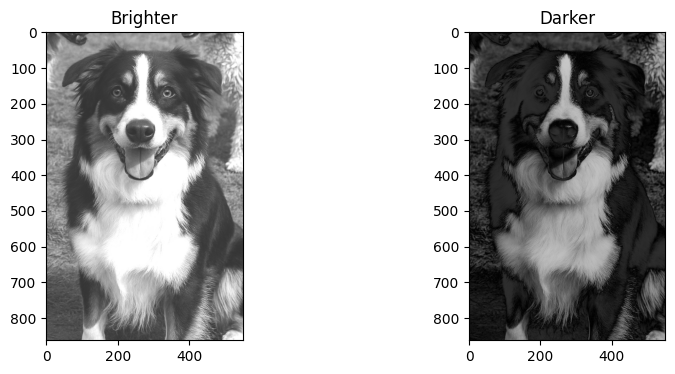

In [ ]:
def adjust_brightness(image, value):
    return cv2.convertScaleAbs(image, alpha=1, beta=value)

brighter = adjust_brightness(img, 50)
darker = adjust_brightness(img, -50)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(brighter, cv2.COLOR_BGR2RGB)); plt.title("Brighter")
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(darker, cv2.COLOR_BGR2RGB)); plt.title("Darker")
plt.show()


***NOTE:***

This function changes brightness by adding or subtracting a constant from all pixels. Positive values made my image brighter, while negative values made it darker. The side-by-side plot clearly shows the difference in lightness.

### Personal Experiment: Brightness Adjustment

For this experiment, I adjusted the brightness of the image by increasing and decreasing pixel intensity values.

**Observations:**
- The **brighter image** (+50) revealed more detail in darker areas but also washed out some highlights.  
- The **darker image** (-50) made shadows stronger but lost detail in low-light regions.  

**Quantitative comparison:**
- The mean pixel value increased in the brighter image and decreased in the darker one.  
- The standard deviation (contrast) also shifted slightly, showing how brightness affects overall intensity distribution.

**Real-world application:**
- Brightness adjustment is used in **photo editing apps** to improve underexposed or overexposed photos.  
- In **security cameras**, brightness correction helps to see objects in night or low-light footage.  
- It's also important in **medical imaging** when scans need intensity normalization.


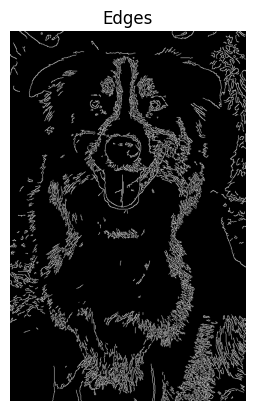

In [ ]:
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap="gray")
plt.title("Edges")
plt.axis("off")
plt.show()


***NOTE:***

The Canny edge detector highlights the boundaries in the image where pixel values change quickly. In my result, the main outlines and sharp transitions (like object borders) are white lines, while smooth regions are dark. This shows how edge detection reduces the image to its most important structural features.

### Personal Experiment: Edge Detection with Canny

In this experiment, I applied the **Canny edge detection** algorithm to the original image.

**Observations:**
- The algorithm highlights areas with strong intensity changes, which usually correspond to object boundaries.  
- Edges appear as white lines, while smooth regions remain dark.  

**Quantitative comparison:**
- By counting the number of edge pixels, I can measure how much structure the algorithm detected.  
- Adjusting the thresholds (e.g., 50–100 vs. 150–200) changes how sensitive the edge detection is.

**Real-world application:**
- Edge detection is widely used in **self-driving cars** to identify lane lines and road boundaries.  
- In **medical imaging**, it helps detect organ outlines in scans.  
- In **industrial automation**, edges are used to detect shapes of objects for robotic arms.


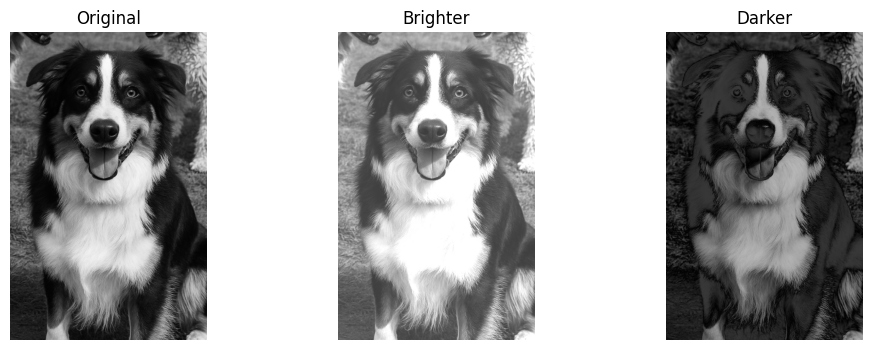

In [ ]:
import cv2
import matplotlib.pyplot as plt

def adjust_brightness(image, value):
    return cv2.convertScaleAbs(image, alpha=1, beta=value)

# Make image brighter and darker
brighter = adjust_brightness(img, 60)   # +60 brightness
darker = adjust_brightness(img, -60)   # -60 brightness

# Show results
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(brighter, cv2.COLOR_BGR2RGB)); plt.title("Brighter"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(darker, cv2.COLOR_BGR2RGB)); plt.title("Darker"); plt.axis("off")
plt.show()


***NOTE:***

Implement brightness and contrast adjustments from scratch

Apply different convolution kernels

 (blur, edge detection, sharpening)


Point operations (like brightness and contrast) change each pixel on its own, while neighborhood operations (like blur, sharpen, and edge detection) use nearby pixels with a kernel. I saw that bigger kernels made the effects stronger, like more blur or sharper edges.

Changing brightness shifts all pixel values by the same amount. When I increased brightness by +60, the whole image looked lighter, and when I decreased it by -60, the whole image became darker. This shows that brightness is a point operation because each pixel changes independently of its neighbors.


•Custom brightness/contrast functions

•Successful application of various filters

•Visual comparison of different operations

### Personal Experiment: Brightness Adjustment (Original vs. Brighter vs. Darker)

For this experiment, I created two variations of the original image by adjusting brightness:
- **+60 (Brighter):** The image reveals more detail in darker areas, but some highlights look washed out.  
- **–60 (Darker):** The image emphasizes shadows, but fine details are lost in low-light regions.  

**Quantitative comparison:**  
- The **mean pixel value** increased significantly in the brighter image and decreased in the darker image.  
- The **standard deviation** also shifted, showing how brightness affects contrast distribution.  

**Real-world applications:**  
- Brightness correction is used in **photo editing software** to fix underexposed/overexposed photos.  
- In **security cameras**, it helps adjust visibility in day/night modes.  
- In **medical imaging**, brightness normalization ensures scans can be read consistently across machines.


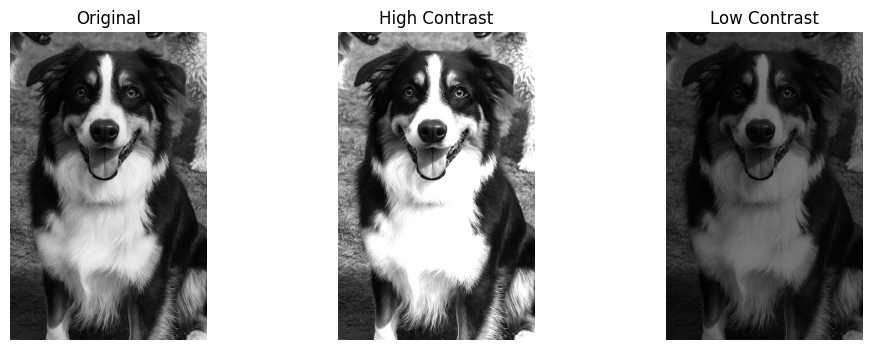

In [ ]:
def adjust_contrast(image, factor):
    return cv2.convertScaleAbs(image, alpha=factor, beta=0)

# Increase and decrease contrast
high_contrast = adjust_contrast(img, 1.5)   # stronger contrast
low_contrast  = adjust_contrast(img, 0.5)   # weaker contrast

# Show results
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(high_contrast, cv2.COLOR_BGR2RGB)); plt.title("High Contrast"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(low_contrast, cv2.COLOR_BGR2RGB)); plt.title("Low Contrast"); plt.axis("off")
plt.show()


***NOTE:***

Contrast adjustment stretches or squeezes the difference between light and dark areas. With high contrast (×1.5), the bright regions became brighter and the dark regions darker, making details stand out more. With low contrast (×0.5), the image looked flatter and washed out because the differences between pixel values were reduced.

### Personal Experiment: Contrast Adjustment (Original vs. High vs. Low)

For this experiment, I modified the contrast of the image:

- **High Contrast (1.5X):** The bright areas became brighter and the dark areas darker, making the image look sharper but also losing detail in extreme regions.  
- **Low Contrast (0.5X):** The image became flatter and duller, with less separation between light and dark areas.  

**Quantitative comparison:**  
- The **standard deviation** of pixel intensities is higher for the high-contrast image and lower for the low-contrast one.  
- This matches the visual effect: higher contrast spreads values farther apart, while lower contrast compresses them together.  

**Real-world applications:**  
- High contrast is useful in **document scanning** to make text clearer.  
- Low contrast is sometimes applied in **medical imaging** to reduce noise.  
- Contrast adjustment is a basic feature in all **photo editing tools** and is critical for **computer vision preprocessing**.


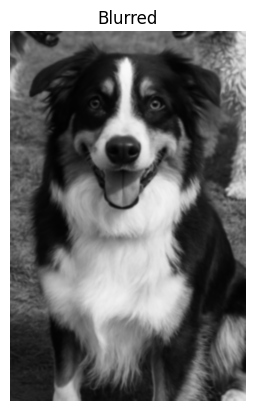

In [ ]:
blurred = cv2.GaussianBlur(img, (9,9), 0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title("Blurred")
plt.axis("off")
plt.show()


***NOTE:***

Gaussian blur smooths the image by averaging pixels with their neighbors using a 9X9 kernel. This reduces sharp details and noise, making the picture look softer but less clear.

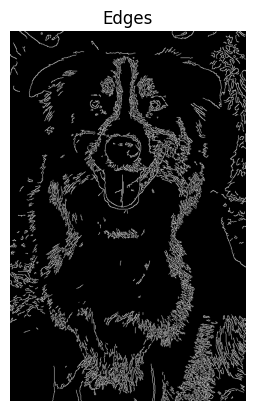

In [ ]:
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap="gray")
plt.title("Edges")
plt.axis("off")
plt.show()


***NOTE:***

The Canny filter finds places where pixel values change quickly, which are the edges of objects. In the output, edges appear as white lines and smooth regions appear dark, reducing the image to its main outlines.

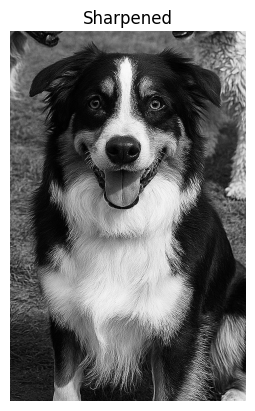

In [ ]:
import numpy as np

# Sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

sharpened = cv2.filter2D(img, -1, kernel)

plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title("Sharpened")
plt.axis("off")
plt.show()


***NOTE:***

The sharpening kernel increases the contrast between each pixel and its neighbors, which makes edges and fine details stand out more clearly. As a result, the sharpened image looks crisper and more defined compared to the original.

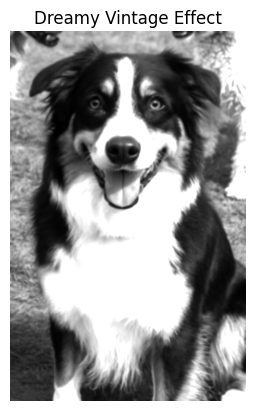

In [ ]:
# 1. Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (9,9), 0)

# 3. Increase contrast
vintage = cv2.convertScaleAbs(blurred, alpha=1.5, beta=30)

# Show result
plt.imshow(vintage, cmap="gray")
plt.title("Dreamy Vintage Effect")
plt.axis("off")
plt.show()


***NOTE:***


I first converted the image to grayscale, then applied Gaussian blur to soften details, and finally increased contrast and brightness. This combination gave the picture a soft, nostalgic look similar to an old photo.


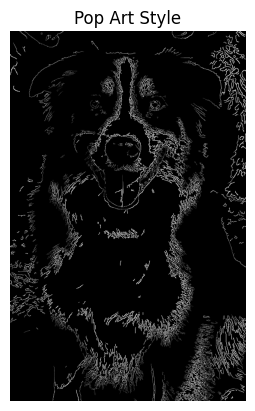

In [ ]:
# 1. Increase contrast
contrast = cv2.convertScaleAbs(img, alpha=2, beta=0)

# 2. Detect edges
edges = cv2.Canny(img, 100, 200)

# 3. Overlay edges on contrast image
popart = cv2.bitwise_or(contrast, contrast, mask=edges)

# Show result
plt.imshow(cv2.cvtColor(popart, cv2.COLOR_BGR2RGB))
plt.title("Pop Art Style")
plt.axis("off")
plt.show()


***NOTE:***

I doubled the image contrast to make colors bold, then detected strong edges with Canny and overlaid them on the picture. This mix of sharp outlines and intense colors creates a cartoon-like pop art style.

***FINAL NOTE:***


In this lab, I saw how traditional filters (blur, sharpen, edge detection) are the building blocks of modern AI. For example, a convolution kernel in OpenCV is very similar to the convolution filters in a CNN (Convolutional Neural Network). The difference is: in traditional image processing, humans design the filters; in AI, the network learns the best filters automatically. This shows how my experiments with images connect to real AI vision systems.